In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
def eval_cheb(n,x):
    if n==0:
        return 1
    elif n==1:
        return x
    else:
        return 2*x*eval_cheb(n-1,x)-eval_cheb(n-2,x)
def eval_cheb_outside1(n,delta):
    return eval_cheb(n,1+delta)

In [39]:
eval_cheb_outside1(3,.1)

2.024000000000001

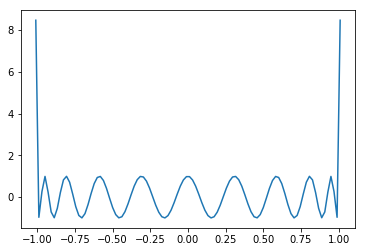

In [18]:
delta = .01
xvals = np.linspace(-1-delta,1+delta,100)
fvals = np.zeros(100)
for i in range(len(xvals)):
    fvals[i] = eval_cheb(20,xvals[i])
plt.plot(xvals,fvals)

In [36]:
def eval_cheb_outside2(n,delta):
    return .5*(1+delta+np.sqrt(delta**2+2*delta))**n+.5*(1+delta-np.sqrt(delta**2+2*delta))**n

In [40]:
eval_cheb_outside2(3,.1)

2.0240000000000009

In [41]:
import scipy.linalg as la

In [58]:
def create_reg_matrix(n,delta):
    mat = np.zeros((n+1,n+1))
    mat[0,:] = .5*(1+delta+np.sqrt(delta**2+2*delta))**np.arange(n+1)+.5*(1+delta-np.sqrt(delta**2+2*delta))**np.arange(n+1)-1
    return mat

def create_cheb_matrix(n):
    mat = np.zeros((n+1,n+1))
    for j in range(n+1):
        if j==0 or j==n:
                pj = 2
        else:
            pj = 1
        for k in range(n+1):
            if k==0 or k==n:
                pk = 2
            else:
                pk = 1
            mat[j,k] = 2*np.cos(np.pi*(j+1)*(k+1)/n)/(n*pk*pj)
    return mat

def cheb_nodes(n):
    return np.cos(np.pi*np.arange(n+1)/n)

def cheb_interp(f,n):
    xvals = cheb_nodes(n)
    fvals = f(xvals)
    A = create_cheb_matrix(n)
    return np.dot(A,fvals)

In [68]:
la.inv(create_cheb_matrix(2))

array([[  4.08280984e+15,  -1.50000000e+00,  -4.08280984e+15],
       [ -1.50000000e+00,   2.46519033e-32,  -5.00000000e-01],
       [ -4.08280984e+15,  -5.00000000e-01,   4.08280984e+15]])